# **Aashray - Week 3 Data science bootcamp**

Q1

<ipython-input-3-19aa3d85e5a8>:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['hour_beginning'] = pd.to_datetime(df['hour_beginning'], errors='coerce')


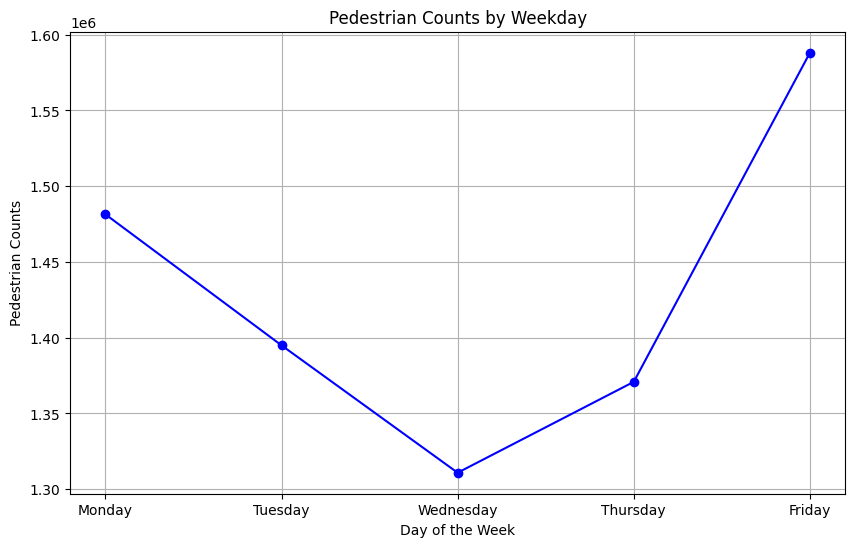

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

url = "https://data.cityofnewyork.us/api/views/6fi9-q3ta/rows.csv?accessType=DOWNLOAD"
df = pd.read_csv(url)

df['hour_beginning'] = pd.to_datetime(df['hour_beginning'], errors='coerce')
df = df[df['hour_beginning'].dt.weekday < 5]

weekday_counts = df.groupby(df['hour_beginning'].dt.day_name())['Pedestrians'].sum()

weekday_counts = weekday_counts.reindex(["Monday", "Tuesday", "Wednesday", "Thursday", "Friday"])

# Plot the line graph
plt.figure(figsize=(10, 6))
plt.plot(weekday_counts.index, weekday_counts.values, marker='o', linestyle='-', color='b')
plt.title("Pedestrian Counts by Weekday")
plt.xlabel("Day of the Week")
plt.ylabel("Pedestrian Counts")
plt.grid(True)
plt.show()


Q2

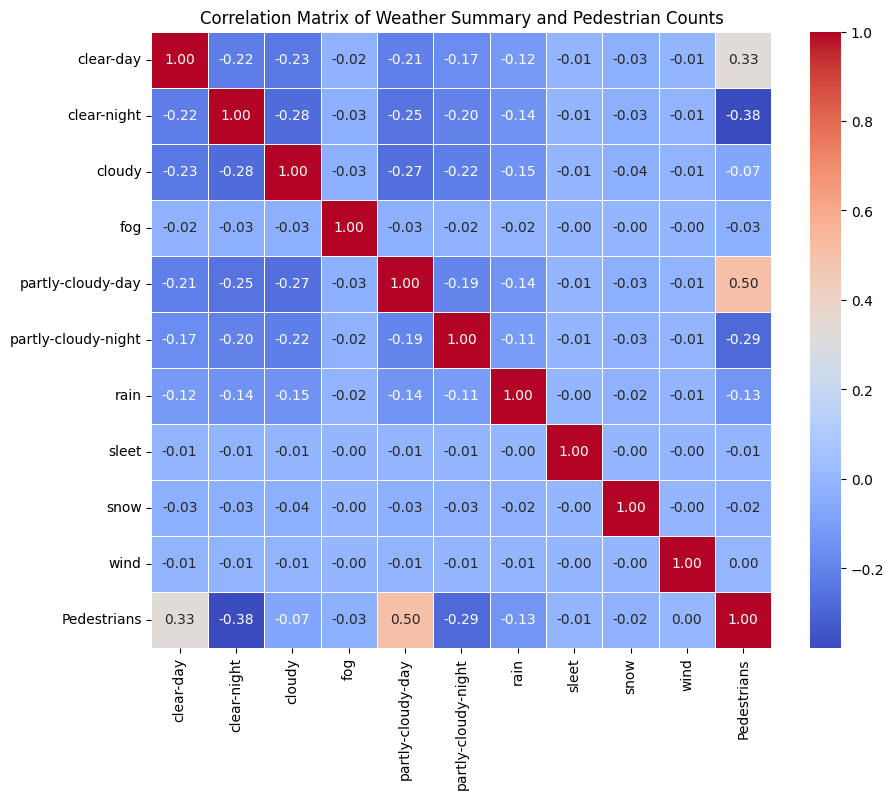

In [4]:
import seaborn as sns

brooklyn_bridge_2019 = df[(df['location'] == 'Brooklyn Bridge') & (df['hour_beginning'].dt.year == 2019)]

weather_encoded = pd.get_dummies(brooklyn_bridge_2019['weather_summary'])

encoded_data = pd.concat([weather_encoded, brooklyn_bridge_2019['Pedestrians']], axis=1)

correlation_matrix = encoded_data.corr()

# Plot correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Weather Summary and Pedestrian Counts')
plt.show()


Q3

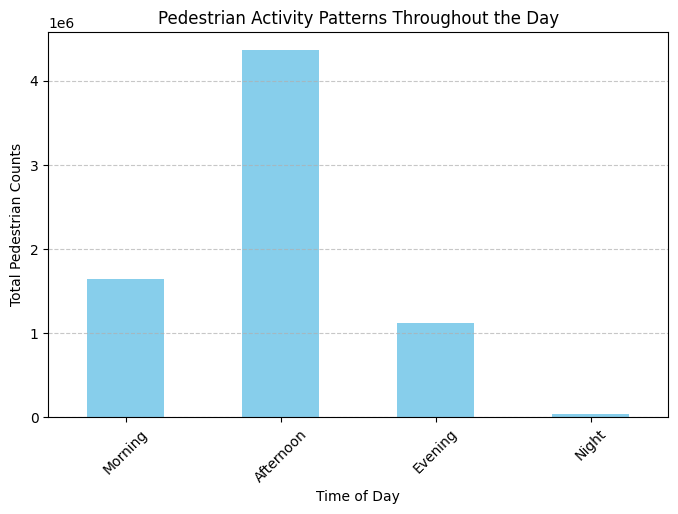

In [6]:
def categorize_time_of_day(hour):
    if 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 18:
        return 'Afternoon'
    elif 18 <= hour < 24:
        return 'Evening'
    else:
        return 'Night'

# Apply the function to create a new column for time of day
df['Time of Day'] = df['hour_beginning'].dt.hour.apply(categorize_time_of_day)

# Aggregate pedestrian counts by time of day to analyze patterns
# Replace 'PedestrianCount' with the actual pedestrian count column name if it differs
time_of_day_activity = df.groupby('Time of Day')['Pedestrians'].sum().reindex(['Morning', 'Afternoon', 'Evening', 'Night'])

# Plot pedestrian activity by time of day
plt.figure(figsize=(8, 5))
time_of_day_activity.plot(kind='bar', color='skyblue')
plt.title("Pedestrian Activity Patterns Throughout the Day")
plt.xlabel("Time of Day")
plt.ylabel("Total Pedestrian Counts")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()